In [1]:
# Import the necessary lib.
# Load the data into DF
# Identify the X (feature) and Y (outcome/response) variables in the DF 
# Splitting the data into training and validation data
# Model fitting
# Model Diagnostics ###
# Model Performance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('HomeProducts_raw_data.csv')

In [4]:
df

,S.I,Advertisement,Sales
0,1,62.00,270.0
1,2,76.33,200.0
2,3,72.00,240.0
3,4,60.00,250.0
4,5,61.00,180.0
5,6,55.00,300.0
6,7,70.00,260.0
7,8,68.00,235.0
8,9,82.80,425.0
9,10,59.00,240.0


### Statsmodel is a library that has a host of statistical learning models. 
### OLS() model : resides in the Statsmodel

In [8]:
x = sm.add_constant(df.Advertisement.values)
y = df.Sales.values

#### # To estimate regr coeff (B0), a constant term of 1 needs to be added as a separate column. This value 
#### temp. remains the same for all rows. Eventually, this will help the model arrive at B0(intercept)

In [7]:
import statsmodels.api as sm

#### Fitting the Model using OLS method; pass y and X as parameters
#### OLS is Ordinary Least Squares

In [10]:
model = sm.OLS(y,x).fit()

#### The fit() method on OLS estimates the reg coeff. and returns the model information to the 'model' 
#### variable. The model information contains the reg coeff., accuracy measures and residual values. 

In [12]:
##  Getting the reg coefficients

# constant, slope

In [11]:
model.params

array([61.55535534,  3.07617744])

In [13]:
# Information required for Diagnostics

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     8.893
Date:                Thu, 16 May 2024   Prob (F-statistic):            0.00449
Time:                        17:29:52   Log-Likelihood:                -283.20
No. Observations:                  50   AIC:                             570.4
Df Residuals:                      48   BIC:                             574.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.5554     66.702      0.923      0.361     -72.558     195.669
x1             3.0762      1.032      2.982      0.004       1.002       5.150
==============================================================================
Omnibus:                        1.393   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.291
Skew:                           0.256   Prob(JB):                        0.524
Kurtosis:                       2.403   Cond. No.                         428.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Prediction of X values (Y-hat: fitted values)
#### predict() method takes in new values of X as a parameter and returns values of Y
#### # pred_y

In [15]:
pred_y = model.predict(x)

#### Important Performance Metrics - R square and MSE

####  Measure the accuracy of our predictions: r2_score: R-squared
#### MSE : Mean Squared Error

In [17]:
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
r2_score(y,pred_y)

0.1563153075433753

In [19]:
# The model only explains 15.6% of the variance in Y. 

#### MSE (mean of the square of the difference between y and pred_y)

In [20]:
mse = mean_squared_error(y,pred_y)
mse

4866.041177799039

##### RMSE: root mean squared error

In [21]:
rmse = np.sqrt(mse)
rmse

69.75701525867517

#### RMSE means the average error the model makes in predicting the outomce. The smaller the value of 
#### RMSE, the better the model is. 

# With Train Test Split

In [22]:
df1 = pd.read_csv('HomeProducts_raw_data.csv')

In [23]:
x1 = sm.add_constant(df.Advertisement.values)
y1 = df.Sales.values

#### train_test_split() function from sklearn.model_selection module provides the ability to split
#### the dataset randomly into training and validation datasets


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

##### # training data > model learning (fit)
#### # testing data > model evaluation/perf.metrics

#### # Source: X and y data

#### # training data > X and y > train_X and train_y [ model will learn from this..]
#### # train_X, train_y are subsets of X and y respectively.

#### # testing data > X and y > test_X and test_y [model will predict using test_X and perf. evaluation
#### # will happen against test_y]

#### # random_state is just a seed value for repeatability of results. 

In [25]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,train_size=0.8,random_state=42)

###  model learns from training data alone
### OLS method takes in training y and training X data as parameters

In [30]:
model_t = sm.OLS(y1_train, x1_train).fit()

##### params gives you B0 and B1

In [31]:
model_t.params

array([106.61049393,   2.3742293 ])

#### summary gives a list of statistical information

In [32]:
model_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     3.830
Date:                Thu, 16 May 2024   Prob (F-statistic):             0.0577
Time:                        17:56:02   Log-Likelihood:                -228.16
No. Observations:                  40   AIC:                             460.3
Df Residuals:                      38   BIC:                             463.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.6105     78.694      1.355      0.183     -52.697     265.918
x1             2.3742      1.213      1.957      0.058      -0.082       4.830
==============================================================================
Omnibus:                        0.978   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.613   Jarque-Bera (JB):                0.903
Skew:                           0.147   Prob(JB):                        0.637
Kurtosis:                       2.326   Cond. No.                         434.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Making prediction using test_X data

In [33]:
yt_pred = model_t.predict(x1_test)
yt_pred

array([303.67152597, 230.07041762, 284.67769156, 243.31861712,
       269.00777817, 263.30962785, 225.32195902, 259.98570682,
       237.19310553, 246.69002273])

### Import Performance metrics - R squared and MSE

In [34]:
# Measure the accuracy of our predictions: r2_score: R-squared
# MSE : Mean Squared Error

In [37]:
r2_score(y1_test,yt_pred)

0.3805122592921437

In [41]:
# MSE (mean of the square of the difference between y and pred_y)

In [42]:
mse_t = mean_squared_error(y1_test,yt_pred)
mse_t

3480.5547019026476

#### Rmse

In [43]:
rmse_t = np.sqrt(mse_t)
rmse_t

58.9962261666172

### Predicting a single Observation

In [44]:
x_new = [1,60]
pred_y_new = model_t.predict(x_new)

In [45]:
pred_y_new

array([249.06425203])

### Prediction Intervals

In [52]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [53]:
_, pred_y_low, pred_y_high = wls_prediction_std(model_t,x_new,alpha=0.05)

In [54]:
pred_y_low, pred_y_high

(array([96.05856835]), array([402.06993572]))

### Normal P-P Plot

In [55]:
sales_residuals = model_t.resid
sales_residuals

array([ 164.69037215,  -71.43848134,    5.92958238,  121.80331989,
          0.93574797,  -12.80654505,   99.53944732,  -88.05808645,
         -0.43231575,   44.75952624,   -6.69002273,  -42.17460877,
       -102.94772972,   39.48810264,  -49.06425203,   16.18728936,
         78.88365239,  -64.30346226,   38.19962053,   62.80689447,
       -115.68385715,  -69.06425203,  -90.45808645,  -87.83541653,
         34.67804098,  -37.55500366,  -33.49057691,  100.43266517,
       -110.07041762,  105.94807914,    5.68420657,   29.56768425,
        -41.80654505,   49.03636452, -136.18693994,  -33.05808645,
         16.74684602,   31.94191355,  115.68420657,   30.18112378])

<Figure size 800x1600 with 0 Axes>

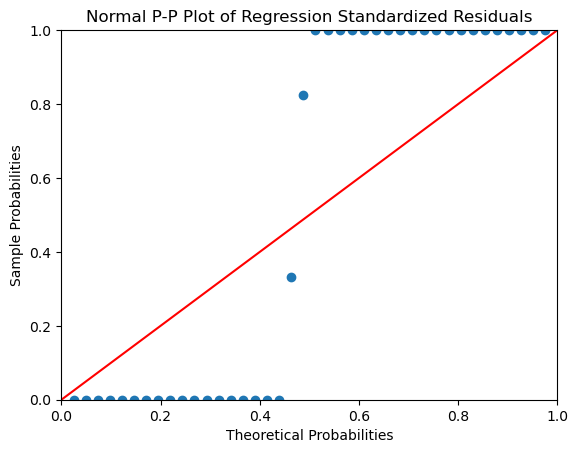

In [56]:
probplot = sm.ProbPlot(sales_residuals)
plt.figure(figsize = (8,16))
probplot.ppplot(line='45')
plt.title('Normal P-P Plot of Regression Standardized Residuals')
plt.show()

## Test for Constant Variance

In [57]:
def standardize(vals):
    return (vals - vals.mean())/vals.std()

In [ ]:
plt.scatter(standardize(model.fittedvalues), standardize(sales_residuals))
plt.title('Residuals vs Predicted values')
plt.xlabel('Standardized Predicted values')
plt.ylabel('Standardized residuals')
plt.show()

In [61]:
standardize(model.fittedvalues)

array([-0.19695027,  1.27116114,  0.82755176, -0.40185068, -0.29940047,
       -0.91410169,  0.62265135,  0.41775095,  1.93401395, -0.50430088,
       -0.60675108, -0.40185068,  0.21285054,  1.95450399,  0.41775095,
       -2.72439677,  1.54470318,  0.45873103,  0.62265135, -0.50430088,
       -0.09450007, -1.4263527 ,  0.52020115, -1.2214523 , -1.52880291,
        0.06942026, -1.4263527 ,  1.03245216, -0.60675108,  0.31530074,
        1.13490237, -0.40185068, -0.91410169,  1.44225298, -1.41815669,
       -0.81165149,  0.41775095, -1.2214523 , -1.01655189, -1.2214523 ,
        1.23735257,  0.0899103 ,  1.07343225,  1.08367727,  0.98122706,
       -0.64978017,  0.41775095,  0.52020115,  0.21285054, -0.31989051])

In [62]:
standardize(sales_residuals)

array([ 2.26838149, -0.98396601,  0.08167177,  1.67767182,  0.01288863,
       -0.1763924 ,  1.37101785, -1.21287803, -0.00595455,  0.6165004 ,
       -0.09214579, -0.58089675, -1.41796221,  0.54389385, -0.67579203,
        0.22295746,  1.08651292, -0.88569102,  0.5261468 ,  0.86507787,
       -1.59338471, -0.9512643 , -1.2459347 , -1.20981106,  0.47764192,
       -0.5172681 , -0.46128625,  1.38332069, -1.51606736,  1.45928787,
        0.07829206,  0.40725385, -0.57582718,  0.67540792, -1.87578624,
       -0.4553293 ,  0.23066458,  0.43995556,  1.59338952,  0.41570313])